This is a simple script to plot partial and total density of states (p-DOS and t-DOS) from the output of VASP. It is specific for the partial s- p- and d-electron DOS, considering both up and down spin configurations.

For other cases, such as including f-electrons or plotting the contributions of different type of atoms, one can easily achieve by modifying the script.

A DOSCAR is necessary as an input.

Here, I take RMnO_3(ferromagnetic state) as an example.

In [1]:
# Import operator numpy and matplotlib
# Plot function for Python
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

/Users/qiuruihao/.conda/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Define a function myFloat transform myList to float
def myFloat(myList):
    return map(float, myList)

In [3]:
# Read input file DOSCAR
dos = [line.split() for line in open ('DOSCAR', 'r')]

In [4]:
# Read NEDOS -- number of energy points
nedos = int(dos[5][2])
# Read number of atoms
natom = int(dos[0][0])
# Read Fermi level
ef = float(dos[5][3])
# print nedos, natom, ef

1001 40 5.91823154


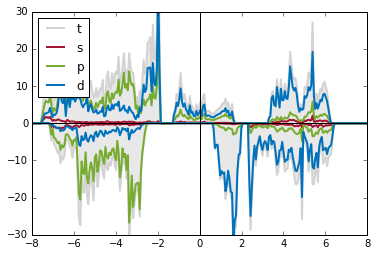

In [5]:
# Read the partial dos

# Notice that VASP write the partial DOS in the sequence -
# s p_y p_z p_x d_xy d_yz d_z^2 d_xz d_x^2-y^2 (spin-up and down)
pdos = np.zeros((nedos, 19))
for i in range(natom):
    pdos = pdos + np.array(map(myFloat, dos[(nedos+1)*(i+1)+6:(nedos+1)*(i+2)+5]))
t_pdos = pdos.T
energy = t_pdos[0]/natom-ef

s_up = t_pdos[1]
p_up = t_pdos[3] + t_pdos[5] + t_pdos[7]
d_up = t_pdos[9] + t_pdos[11] + t_pdos[13] + t_pdos[15] + t_pdos[17]
t_up = s_up + p_up + d_up

s_d = -t_pdos[2]
p_d = -t_pdos[4] - t_pdos[6] - t_pdos[8]
d_d = -t_pdos[10] - t_pdos[12] - t_pdos[14] - t_pdos[16] - t_pdos[18]
t_d = s_d + p_d + d_d

# set x and y axis range 
axes = plt.gca()
axes.set_xlim([-8,8])
axes.set_ylim([-30,30])

plt.fill_between(energy, 0, t_up, color='lightgrey', alpha=0.5)
plt.fill_between(energy, 0, t_d, color='lightgrey', alpha=0.5)
plt.plot(energy, t_up, label='t', color='lightgrey', lw=2)
plt.plot(energy, t_d, color='lightgrey', lw=2)

plt.plot(energy, s_up, label='s', color='#a2142f', lw=2)
plt.plot(energy, p_up, label='p', color='#77ac30', lw=2)
plt.plot(energy, d_up, label='d', color='#0072bd', lw=2)

plt.plot(energy, s_d, color='#a2142f', lw=2)
plt.plot(energy, p_d, color='#77ac30', lw=2)
plt.plot(energy, d_d, color='#0072bd', lw=2)

plt.plot([0.0, 0.0], [-30.0, 30.0], 'k-', lw=1)
plt.plot([-10.0,10.0], [0.0, 0.0], 'k-', lw=1)
plt.legend(loc='upper left')
plt.show()
#plt.savefig("p0.eps", format="eps")